In [11]:
# Building Recurrent Neural Network Algorithm For Google Stock Price Dataset
import pandas as pd
dataset=pd.read_csv('/content/sample_data/Google_Stock_Price_Train.csv')
print(dataset.head(4))

       Date    Open    High     Low   Close     Volume
0  1/3/2012  325.25  332.83  324.97  663.59  7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45  5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21  6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24  5,405,900


In [12]:
# Split the train_set into indepedent input attribute
train_set=dataset.iloc[:,1:2].values
print(train_set[0:5,])

[[325.25]
 [331.27]
 [329.83]
 [328.34]
 [322.04]]


In [13]:
# Rescale the input attribute 
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_set_scaled=sc.fit_transform(train_set)
print(train_set_scaled[0:5,])

[[0.08581368]
 [0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]]


In [18]:
# Create a dataset structure  with 60 timesteps and 1 output
import numpy as np
x_train=[]
y_train=[]
print(len(train_set))
for i in range(60,len(train_set)):
  x_train.append(train_set_scaled[i-60:i,])
  y_train.append(train_set_scaled[i,])
# Converting Vector to numpy array or array of matrix
x_train,y_train=np.array(x_train),np.array(y_train)

1258


In [0]:
# Resampling X_train from 2d numpy array to 3d numpy array
# batchsize= No.of Row in a column of dataset making as x_train.shape[0]
# timesteps = No. of columns in a row to get that is x_train.shape[1]
# input_dim= No. of input dims are 1
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [21]:
# Building the RNN Algorithm
# Initalizing the RNN

from keras.models import Sequential
rnn=Sequential()
# Adding First LSTM layer and some percentage of dropout regularisation

from keras.layers import LSTM
from keras.layers import Dropout
# units= No.of LSMT's in each layer.
# return_sequence= Return the backpropagation is True
# input_shape=input layer values
rnn.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
# p=0.2 20% of nodes will randomly disabled to prevent overfitting in training set
rnn.add(Dropout(p=0.2))

# Second LSTM layer and Dropout Regularisation
rnn.add(LSTM(units=50,return_sequences=True))
rnn.add(Dropout(p=0.2))

# Third LSTM layer and Dropout Regularisation
# return_sequencs=True is not required because this layer connected with output layer back propagation will done automatically
rnn.add(LSTM(units=50))
rnn.add(Dropout(p=0.2))

# Output Layer For LSTM

from keras.layers import Dense
rnn.add(Dense(units=1))

# Compile the LSTM RNN Algorithm
# adam algorithm is technique of stochastic gradient descent class
rnn.compile(optimizer='adam',loss='mean_squared_error')

# Fit the RNN Algorithm To Training Set
rnn.fit(x_train,y_train,batch_size=32,epochs=125)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.2)`


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/125





1198/1198 [==============================] - 9s 8ms/step - loss: 0.0609
Epoch 2/125
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0056
Epoch 3/125
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 4/125
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 5/125
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0040
Epoch 6/125
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0043
Epoch 7/125
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0042
Epoch 8/125
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0040
Epoch 9/125
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0040
Epoch 10/125
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0034
Epoch 11/125
1198/1198 [==============================] -

In [0]:
# We got 0.0012 loss value for Google Stock Price Training set

In [27]:
# Predicting the accuracy for test set

# Importing the Google Stock Price Test Data
dataset_test=pd.read_csv('/content/sample_data/Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values

# Concat with training and test set data because on each test set data we need to 60 timesteps to get t+1 first values from predict
# axis=0 means it will add concat to vertical values if it is 1 then concat will happen horizontal
dataset_total=pd.concat((dataset['Open'],dataset_test['Open']),axis=0)

# We need to find before 60 data values to predict first jan value in 2017.
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:,].values

# We have only 1D Array we need make it as 2D by using reshape -1 to 1
inputs=inputs.reshape(-1,1)

#Rescale the Google Stock Price Test data
inputs=sc.transform(inputs)

x_test=[]
for i in range(60,80):
  x_test.append(inputs[i-60:i,])
# converting numpy vector to numpy array
x_test=np.array(x_test)

# Reshape the x_test from 2d to 3d
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# Now Predicting The Google Stock Price Test Data
predicted_real_stock_price=rnn.predict(x_test)

# Applying inverse transform to get actual values
predicted_real_stock_price=sc.inverse_transform(predicted_real_stock_price)

print(predicted_real_stock_price)

[[784.9555 ]
 [781.66064]
 [783.57855]
 [786.3967 ]
 [790.7081 ]
 [797.69824]
 [803.1313 ]
 [803.79083]
 [802.9804 ]
 [802.9814 ]
 [803.6717 ]
 [803.8396 ]
 [803.3433 ]
 [803.58704]
 [804.4316 ]
 [810.7528 ]
 [819.5664 ]
 [827.62195]
 [829.9304 ]
 [821.24817]]


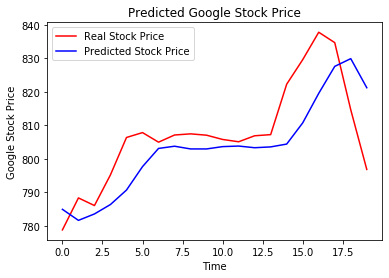

In [28]:
# Visualising the real stock price to predicted stock price

import matplotlib.pyplot as plt
plt.plot(real_stock_price,color='red',label='Real Stock Price')
plt.plot(predicted_real_stock_price,color='blue',label='Predicted Stock Price')
plt.title('Predicted Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()